In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
yearly = pd.read_csv("yearly_deaths_by_clinic.csv")
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [13]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"]=yearly["deaths"]/yearly["births"]*100
print(yearly["proportion_deaths"])

0      7.806324
1     15.759051
2      8.954248
3      8.235667
4      6.901489
5     11.446384
6      3.521704
7      7.596841
8      5.987587
9      2.300406
10     2.036409
11     2.797017
Name: proportion_deaths, dtype: float64


In [14]:
# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly.iloc[0:6]
clinic_2 = yearly.iloc[6:12]
print(clinic_1)
print(clinic_2)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           7.806324
1  1842    3287     518  clinic 1          15.759051
2  1843    3060     274  clinic 1           8.954248
3  1844    3157     260  clinic 1           8.235667
4  1845    3492     241  clinic 1           6.901489
5  1846    4010     459  clinic 1          11.446384
    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           3.521704
7   1842    2659     202  clinic 2           7.596841
8   1843    2739     164  clinic 2           5.987587
9   1844    2956      68  clinic 2           2.300406
10  1845    3241      66  clinic 2           2.036409
11  1846    3754     105  clinic 2           2.797017


In [15]:
yearly.groupby(['clinic','deaths'])['deaths'].count()

clinic    deaths
clinic 1  237       1
          241       1
          260       1
          274       1
          459       1
          518       1
clinic 2  66        1
          68        1
          86        1
          105       1
          164       1
          202       1
Name: deaths, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

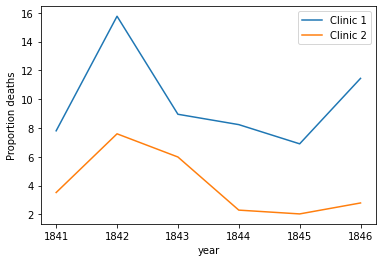

In [16]:
# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths", label="Clinic 1")
clinic_2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax, ylabel="Proportion deaths")

In [17]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("monthly_deaths.csv")
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [19]:
# Calculate proportion of deaths per no. births
monthly["proportion_deaths"]=monthly["deaths"]/monthly["births"]*100
print(monthly.head())

         date  births  deaths  proportion_deaths
0  1841-01-01     254      37          14.566929
1  1841-02-01     239      18           7.531381
2  1841-03-01     277      12           4.332130
3  1841-04-01     255       4           1.568627
4  1841-05-01     255       2           0.784314


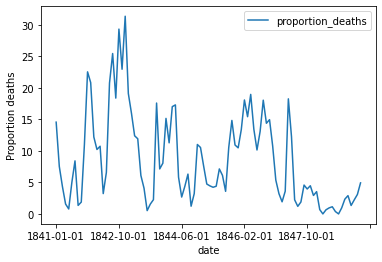

In [20]:
# Plot monthly proportion of deaths
ax=monthly.plot(x="date",y="proportion_deaths",ylabel="Proportion deaths")

         date  births  deaths  proportion_deaths
0  1841-01-01     254      37          14.566929
1  1841-02-01     239      18           7.531381
2  1841-03-01     277      12           4.332130
3  1841-04-01     255       4           1.568627
4  1841-05-01     255       2           0.784314
..        ...     ...     ...                ...
71 1847-01-01     311      10           3.215434
72 1847-02-01     312       6           1.923077
73 1847-03-01     305      11           3.606557
74 1847-04-01     312      57          18.269231
75 1847-05-01     294      36          12.244898

[76 rows x 4 columns]
         date  births  deaths  proportion_deaths
76 1847-06-01     268       6           2.238806
77 1847-07-01     250       3           1.200000
78 1847-08-01     264       5           1.893939
79 1847-09-01     262      12           4.580153
80 1847-10-01     278      11           3.956835
81 1847-11-01     246      11           4.471545
82 1847-12-01     273       8           2.9304

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

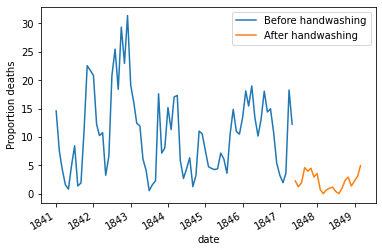

In [21]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')
#Make sure when you grab particular filtered dataframe change your data-time columns into date-time columns by
monthly['date'] = pd.to_datetime(monthly['date'])

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
print(before_washing)
after_washing = monthly[monthly["date"] >= handwashing_start]
print(after_washing)
# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax, ylabel="Proportion deaths")

In [22]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion =before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff =(after_washing["proportion_deaths"].mean())-(before_washing["proportion_deaths"].mean()) 
mean_diff

-8.395660751183334

In [23]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -10.099484
0.975    -6.746602
dtype: float64

In [25]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True